In [1]:
file = open("Royal_data.txt", "r")
royaldata=file.readlines()
file.close()
print(royaldata)

['The future king is the prince\n', 'Daughter is the princess\n', 'Son is the prince\n', 'Only a man can be a king\n', 'Only a woman can be a queen\n', 'The princess will be a queen\n', 'The prince is a strong man\n', 'The princess is a beautiful woman\n', 'Prince is only a boy now\n', 'Prince will be king\n', 'A boy will be a man']


In [2]:
for i in range (len(royaldata)):
    royaldata[i]=royaldata[i].lower().replace('\n','')
    
royaldata

['the future king is the prince',
 'daughter is the princess',
 'son is the prince',
 'only a man can be a king',
 'only a woman can be a queen',
 'the princess will be a queen',
 'the prince is a strong man',
 'the princess is a beautiful woman',
 'prince is only a boy now',
 'prince will be king',
 'a boy will be a man']

In [3]:
stopwords=['the','is','can','be','a','only','will','their','now']
filterdata=[]
for sent in royaldata:
    temp=[]
    for word in sent.split():
        if word not in stopwords:
            temp.append(word)
    filterdata.append(temp)
print(filterdata)
    

[['future', 'king', 'prince'], ['daughter', 'princess'], ['son', 'prince'], ['man', 'king'], ['woman', 'queen'], ['princess', 'queen'], ['prince', 'strong', 'man'], ['princess', 'beautiful', 'woman'], ['prince', 'boy'], ['prince', 'king'], ['boy', 'man']]


In [4]:
biagrams=[]
for wordslist in filterdata:
    for i in range(len(wordslist)-1):
        for j in range(i+1, len(wordslist)):
            biagrams.append([wordslist[i],wordslist[j]])
            biagrams.append([wordslist[j],wordslist[i]])
biagrams        
        
    

[['future', 'king'],
 ['king', 'future'],
 ['future', 'prince'],
 ['prince', 'future'],
 ['king', 'prince'],
 ['prince', 'king'],
 ['daughter', 'princess'],
 ['princess', 'daughter'],
 ['son', 'prince'],
 ['prince', 'son'],
 ['man', 'king'],
 ['king', 'man'],
 ['woman', 'queen'],
 ['queen', 'woman'],
 ['princess', 'queen'],
 ['queen', 'princess'],
 ['prince', 'strong'],
 ['strong', 'prince'],
 ['prince', 'man'],
 ['man', 'prince'],
 ['strong', 'man'],
 ['man', 'strong'],
 ['princess', 'beautiful'],
 ['beautiful', 'princess'],
 ['princess', 'woman'],
 ['woman', 'princess'],
 ['beautiful', 'woman'],
 ['woman', 'beautiful'],
 ['prince', 'boy'],
 ['boy', 'prince'],
 ['prince', 'king'],
 ['king', 'prince'],
 ['boy', 'man'],
 ['man', 'boy']]

In [5]:
combinewords=[]
for sent in filterdata:
    combinewords.extend(sent)           
allwords=list(set(combinewords))
print(allwords)
len(allwords)

['king', 'queen', 'princess', 'boy', 'future', 'son', 'beautiful', 'man', 'strong', 'daughter', 'woman', 'prince']


12

In [6]:
worddict={}
counter=0
for word in allwords:
    worddict[word]=counter
    counter+=1
print(worddict)

{'king': 0, 'queen': 1, 'princess': 2, 'boy': 3, 'future': 4, 'son': 5, 'beautiful': 6, 'man': 7, 'strong': 8, 'daughter': 9, 'woman': 10, 'prince': 11}


In [7]:
import numpy as np
onehotdata= np.zeros((len(worddict),len(worddict)))
for i in range (len(allwords)):
    onehotdata[i][i]=1
    
onehotdict={}
for i in range(len(onehotdata)):
    onehotdict[allwords[i]]=onehotdata[i]
for word in onehotdict:
    print(word,":",onehotdict[word])


king : [1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
queen : [0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
princess : [0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
boy : [0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
future : [0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
son : [0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]
beautiful : [0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
man : [0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
strong : [0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]
daughter : [0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
woman : [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]
prince : [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]


In [8]:
X=[]
Y=[]

for bi in biagrams:
    X.append(onehotdict[bi[0]])
    Y.append(onehotdict[bi[1]])
X=np.array(X)
Y=np.array(Y)


In [9]:
from keras.models import Sequential
from keras.layers import Dense, Input

model = Sequential()
vocalsize = len(onehotdata[0])
embedsize = 2

model.add(Input(shape=(vocalsize,)))
model.add(Dense(embedsize, activation="linear"))
model.add(Dense(vocalsize, activation="softmax"))

model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])


In [17]:
model.fit(X,Y, epochs=500)

Epoch 1/500
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3903 - loss: 1.4581 
Epoch 2/500
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.3903 - loss: 1.4576 
Epoch 3/500
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.3799 - loss: 1.4732 
Epoch 4/500
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.3903 - loss: 1.4561 
Epoch 5/500
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.3799 - loss: 1.4768 
Epoch 6/500
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 0s/step - accuracy: 0.3799 - loss: 1.4657  
Epoch 7/500
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 0s/step - accuracy: 0.3799 - loss: 1.4591  
Epoch 8/500
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.3903 - loss: 1.4453 
Epoch 9/500
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.3799 - loss: 1.4693 
Epoch 10/500
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 0s/step - accuracy: 0.3695 - loss: 1.4765  
Epoch 11/500
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 0s/step - accuracy: 0.3903 - loss: 1.4687  
Epoch 12/500
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 0s/step - accuracy: 0.3695 - loss

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.3799 - loss: 1.4524 
Epoch 70/500
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3799 - loss: 1.4668 
Epoch 71/500
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3799 - loss: 1.4701 
Epoch 72/500
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3903 - loss: 1.4599 
Epoch 73/500
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.3903 - loss: 1.4572 
Epoch 74/500
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3799 - loss: 1.4492 
Epoch 75/500
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.3799 - loss: 1.4638 
Epoch 76/500
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.3799 - loss: 1.4594 
Epoch 77/500
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.3799 - loss: 1.4483 
Epoch 78/500
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.3695 - loss: 1.4670 
Epoch 79/500
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3695 - loss: 1.4734 
Epoch 80/500
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 723us/step - accuracy: 0.3799 - loss:

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3799 - loss: 1.4567 
Epoch 138/500
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.3799 - loss: 1.4428
Epoch 139/500
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 0s/step - accuracy: 0.3799 - loss: 1.4472  
Epoch 140/500
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 0s/step - accuracy: 0.3695 - loss: 1.4619  
Epoch 141/500
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 0s/step - accuracy: 0.3903 - loss: 1.4601  
Epoch 142/500
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.3799 - loss: 1.4489 
Epoch 143/500
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 0s/step - accuracy: 0.3903 - loss: 1.4428  
Epoch 144/500
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.3903 - loss: 1.4472 
Epoch 145/500
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3799 - loss: 1.4510 
Epoch 146/500
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3799 - loss: 1.4623 
Epoch 147/500
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.3903 - loss: 1.4447 
Epoch 148/500
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.379

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 0s/step - accuracy: 0.3695 - loss: 1.4500  
Epoch 206/500
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.3903 - loss: 1.4391 
Epoch 207/500
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.3799 - loss: 1.4562 
Epoch 208/500
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.3799 - loss: 1.4476 
Epoch 209/500
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 0s/step - accuracy: 0.3799 - loss: 1.4427  
Epoch 210/500
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 0s/step - accuracy: 0.3695 - loss: 1.4575  
Epoch 211/500
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.3903 - loss: 1.4355 
Epoch 212/500
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 764us/step - accuracy: 0.3799 - loss: 1.4572
Epoch 213/500
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.3799 - loss: 1.4403 
Epoch 214/500
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.3903 - loss: 1.4491 
Epoch 215/500
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 0s/step - accuracy: 0.3695 - loss: 1.4546  
Epoch 216/500
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.39

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 0s/step - accuracy: 0.3799 - loss: 1.4345  
Epoch 274/500
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.3799 - loss: 1.4404 
Epoch 275/500
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 0s/step - accuracy: 0.3903 - loss: 1.4222  
Epoch 276/500
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 0s/step - accuracy: 0.3903 - loss: 1.4240  
Epoch 277/500
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 0s/step - accuracy: 0.3799 - loss: 1.4404  
Epoch 278/500
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 0s/step - accuracy: 0.3799 - loss: 1.4363  
Epoch 279/500
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.3799 - loss: 1.4394 
Epoch 280/500
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 0s/step - accuracy: 0.3903 - loss: 1.4343  
Epoch 281/500
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.3799 - loss: 1.4385 
Epoch 282/500
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 0s/step - accuracy: 0.3799 - loss: 1.4472  
Epoch 283/500
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.3799 - loss: 1.4302 
Epoch 284/500
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 0s/step - accuracy: 0.3799

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 0s/step - accuracy: 0.3799 - loss: 1.4389  
Epoch 342/500
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.3903 - loss: 1.4325 
Epoch 343/500
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.3799 - loss: 1.4387 
Epoch 344/500
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 0s/step - accuracy: 0.3799 - loss: 1.4317  
Epoch 345/500
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 0s/step - accuracy: 0.3799 - loss: 1.4349  
Epoch 346/500
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.3903 - loss: 1.4328 
Epoch 347/500
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 0s/step - accuracy: 0.3799 - loss: 1.4289  
Epoch 348/500
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 0s/step - accuracy: 0.3903 - loss: 1.4195  
Epoch 349/500
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.3799 - loss: 1.4373 
Epoch 350/500
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.3903 - loss: 1.4135 
Epoch 351/500
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 0s/step - accuracy: 0.3903 - loss: 1.4271  
Epoch 352/500
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 0s/step - accuracy: 0.3799

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.4099 - loss: 1.4264 
Epoch 410/500
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.3995 - loss: 1.4343 
Epoch 411/500
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.4203 - loss: 1.4247 
Epoch 412/500
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.4099 - loss: 1.4280 
Epoch 413/500
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.4203 - loss: 1.4089 
Epoch 414/500
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 0s/step - accuracy: 0.4203 - loss: 1.4248  
Epoch 415/500
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 0s/step - accuracy: 0.4099 - loss: 1.4230  
Epoch 416/500
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 0s/step - accuracy: 0.4099 - loss: 1.4279  
Epoch 417/500
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 847us/step - accuracy: 0.4099 - loss: 1.4268
Epoch 418/500
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.4203 - loss: 1.4282 
Epoch 419/500
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 0s/step - accuracy: 0.4203 - loss: 1.4167  
Epoch 420/500
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.42

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 0s/step - accuracy: 0.4099 - loss: 1.4338  
Epoch 478/500
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 0s/step - accuracy: 0.4203 - loss: 1.4241  
Epoch 479/500
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.3995 - loss: 1.4304 
Epoch 480/500
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.3995 - loss: 1.4398 
Epoch 481/500
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 0s/step - accuracy: 0.4099 - loss: 1.4292  
Epoch 482/500
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.4203 - loss: 1.4281 
Epoch 483/500
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4099 - loss: 1.4245 
Epoch 484/500
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 0s/step - accuracy: 0.4099 - loss: 1.4300  
Epoch 485/500
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.4203 - loss: 1.4149 
Epoch 486/500
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.4203 - loss: 1.4279 
Epoch 487/500
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 0s/step - accuracy: 0.4099 - loss: 1.4278  
Epoch 488/500
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.399

In [18]:
weights = model.get_weights()[0]
wordembeddings={}
for word in allwords:
    wordembeddings[word]=weights[worddict[word]]
for word in allwords:
    print(word,":",wordembeddings[word])

king : [0.22440402 1.7757347 ]
queen : [-0.633171  -1.6722382]
princess : [ 1.0636287 -1.481783 ]
boy : [0.35967684 1.633435  ]
future : [-0.2627441  0.8806221]
son : [1.7410368 1.6123284]
beautiful : [-0.74084926 -2.2855463 ]
man : [-1.0492375  0.830969 ]
strong : [0.31498545 1.5405947 ]
daughter : [-0.2843626 -1.4788007]
woman : [ 1.1725134 -1.2479855]
prince : [-1.8365517  0.9019887]


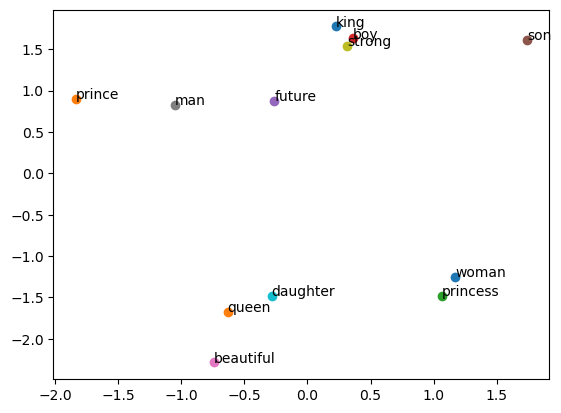

In [19]:
import matplotlib.pyplot as plt
for word in allwords:
    coordinates=wordembeddings[word]
    plt.scatter(coordinates[0],coordinates[1])
    plt.annotate(word,(coordinates[0],coordinates[1]))